# Housing Market in Melbourne, Australia
## Predicting price of real estate with regression

![Colourfull cliffside village](melbourne_photo_1.jpg)
<center> Photo by Michael Block from Pexels </center>

### Introduction
In this notebook I am cleaning and analysing the dataset with prices and features of houses and apartments in Melbourne. I want to prepare a simple model that can be used to predict/asses the value of the house or apartment in Melbourne so I won't  be using features like date of sale, salesman name or method of sale.

I will be building simple, explainable multivariable regression. 

### Dataset

***Melbourne Housing Market***

Source: [Melbourne Housing Market Dataset on Kaggle.com](https://www.kaggle.com/anthonypino/melbourne-housing-market)

This data was scraped from publicly available results posted every week from Domain.com.au.
*License: CC BY-NC-SA 4.0*


***Dataset Content:***
* Suburb: *Suburb*
* Address: *Address*
* Rooms: *Number of rooms*
* Price: *Price in Australian dollars*
* Method: 
 * S - property sold; 
 * SP - property sold prior; 
 * PI - property passed in; 
 * PN - sold prior not disclosed; 
 * SN - sold not disclosed; NB - no bid; 
 * VB - vendor bid; W - withdrawn prior to auction; 
 * SA - sold after auction; 
 * SS - sold after auction price not disclosed. 
 * N/A - price or highest bid not available.
* Type: 
 * br - bedroom(s); 
 * h - house,cottage,villa, semi,terrace;
 * u - unit, duplex; 
 * t - townhouse; 
 * dev site - development site; 
 * o res - other residential.
* SellerG: *Real Estate Agent*
* Date: *Date sold*
* Distance: *Distance from CBD (Central Business District - city centre) in Kilometres*
* Regionname: *General Region (West, North West, North, North east ...etc)*
* Propertycount: *Number of properties that exist in the suburb.*
* Bedroom2 : *Scraped # of Bedrooms (from different source)*
* Bathroom: *Number of Bathrooms*
* Car: *Number of carspots*
* Landsize: *Land Size in Metres*
* BuildingArea: *Building Size in Metres*
* YearBuilt: *Year the house was built*
* CouncilArea: *Governing council for the area*
* Lattitude: *Self explanatory*
* Longtitude: *Self explanatory*

Downloaded on 14.01.2020

### Requirements
***Using:***
* Python 3.7.6
 * numpy 1.18.1
 * pandas 1.0.0
 * matplotlib 3.1.3
 * seaborn 0.10.0
 * sklearn 0.22.1
 * statsmodels 0.11.0

In [1]:
# Importing all needed packages

import numpy as np # arrays and efficient computations on them (ufuncs)
import pandas as pd # data analysis - DataFrames and Series

import matplotlib.pyplot as plt # data visualization 
import seaborn as sns # data visualization

import sklearn as sk # regression model and data preprocessing
from sklearn.impute import SimpleImputer # preprocessing - imputing missing values
from sklearn.model_selection import train_test_split # splitting data into test and train datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from matplotlib import cm # importing cmaps

# overriding matplotlib settings with seaborn default settings
sns.set()

# setting matplotlib visualization as inline using Python magic
%matplotlib inline

### Data Exploration

In [2]:
# Importing the data using pandas - 8th column is a date 
file_path = 'Melbourne_housing_FULL.csv'
data = pd.read_csv(file_path, parse_dates=[7])

In [3]:
# Info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [4]:
# Checking the number of missing values per column
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [5]:
# Setting maximum number of displayed columns to 25
pd.set_option('display.max_columns', 25)

# Viewing the first few rows of data
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
# The last rows of data
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,2018-02-24,6.3,3013.0,2.0,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [7]:
# Description of categorical data and dates
data.describe(include=[np.object, np.datetime64])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34857,34854,34854
unique,351,34009,3,9,388,78,33,8
top,Reservoir,5 Charles St,h,S,Jellis,2017-10-28 00:00:00,Boroondara City Council,Southern Metropolitan
freq,844,6,23980,19744,3359,1119,3675,11836
first,NaN,NaN,NaN,NaN,NaN,2016-01-28 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2018-10-03 00:00:00,NaN,NaN


In [8]:
# Description of numerical data
data.describe(include=[np.number])

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [9]:
# The model would be used to asses value
# so the information like date of sale, method of sale or name of seller are not applicable

data.drop(columns=['SellerG','Date','Method'],inplace=True)

In [10]:
# I have noticed the the lowest year build in the data seems to be 1196

# After quick googling I checked that the oldest building in Melbourne seems to be Cooks Cottage from 1755
# Either only this row or whole feature is corrupted

# Let's see if the other values are more reasonable

Years = data[['YearBuilt']].dropna()
Years[(Years['YearBuilt']<1800) | (Years['YearBuilt'] > 2020)]

,YearBuilt
2453,2106.0
16424,1196.0


In [11]:
# viewing the data without these two outliers
Years.drop([16424,2453], axis='index').describe()

,YearBuilt
count,15549.000000
mean,1965.330311
std,36.799916
min,1800.000000
25%,1940.000000
50%,1970.000000
75%,2000.000000
max,2019.000000


In [12]:
# Since only two rows seems to be corrupted let's drop them

data.drop([16424,2453], axis='index', inplace=True)

### Cleaning Data 

In [13]:
# The minimum Price is 85000 so I will change the column to Price in thousands of dollars
data['Price']=data['Price']/1000

# And change the name of the column
data.rename(columns={'Price':'Price_Thousands'}, inplace=True)

In [14]:
# Checking for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34855 entries, 0 to 34856
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           34855 non-null  object 
 1   Address          34855 non-null  object 
 2   Rooms            34855 non-null  int64  
 3   Type             34855 non-null  object 
 4   Price_Thousands  27246 non-null  float64
 5   Distance         34854 non-null  float64
 6   Postcode         34854 non-null  float64
 7   Bedroom2         26638 non-null  float64
 8   Bathroom         26629 non-null  float64
 9   Car              26127 non-null  float64
 10  Landsize         23045 non-null  float64
 11  BuildingArea     13740 non-null  float64
 12  YearBuilt        15549 non-null  float64
 13  CouncilArea      34852 non-null  object 
 14  Lattitude        26879 non-null  float64
 15  Longtitude       26879 non-null  float64
 16  Regionname       34852 non-null  object 
 17  Propertycoun

#### Handling missing data

Price is the regression target and I will be preparing a supervised regression model
so I will split the dataset into labeled and unlabeled examples based on nulls in this feature.
I will discard unlabeled examples.

In [15]:
# Splitting dataset into labeled and unlabeled
missing_target = data['Price_Thousands'].notnull()
labeled_data = data[missing_target]
unlabeled_data = data[~missing_target]

In [16]:
# Info about labeled dataset
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27246 entries, 1 to 34856
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           27246 non-null  object 
 1   Address          27246 non-null  object 
 2   Rooms            27246 non-null  int64  
 3   Type             27246 non-null  object 
 4   Price_Thousands  27246 non-null  float64
 5   Distance         27245 non-null  float64
 6   Postcode         27245 non-null  float64
 7   Bedroom2         20805 non-null  float64
 8   Bathroom         20799 non-null  float64
 9   Car              20422 non-null  float64
 10  Landsize         17981 non-null  float64
 11  BuildingArea     10655 non-null  float64
 12  YearBuilt        12083 non-null  float64
 13  CouncilArea      27243 non-null  object 
 14  Lattitude        20992 non-null  float64
 15  Longtitude       20992 non-null  float64
 16  Regionname       27243 non-null  object 
 17  Propertycoun

In [17]:
# We have 13 columns including missing data and 9 with full data

# Columns [Distance, Postcode, CouncilArea, Regionname, Propertycount] 
# have less then 4 missing datapoints from dataset with 27427 so I will drop these rows

not_null_rows = ~(labeled_data['Distance'].isnull() 
            | labeled_data['Postcode'].isnull() 
            | labeled_data['CouncilArea'].isnull() 
            | labeled_data['Regionname'].isnull() 
            | labeled_data['Propertycount'].isnull()
            )

labeled_data = labeled_data[not_null_rows]

In [18]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27243 entries, 1 to 34856
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           27243 non-null  object 
 1   Address          27243 non-null  object 
 2   Rooms            27243 non-null  int64  
 3   Type             27243 non-null  object 
 4   Price_Thousands  27243 non-null  float64
 5   Distance         27243 non-null  float64
 6   Postcode         27243 non-null  float64
 7   Bedroom2         20805 non-null  float64
 8   Bathroom         20799 non-null  float64
 9   Car              20422 non-null  float64
 10  Landsize         17981 non-null  float64
 11  BuildingArea     10655 non-null  float64
 12  YearBuilt        12083 non-null  float64
 13  CouncilArea      27243 non-null  object 
 14  Lattitude        20992 non-null  float64
 15  Longtitude       20992 non-null  float64
 16  Regionname       27243 non-null  object 
 17  Propertycoun

In [19]:
# Reviewing the description of categorical data
labeled_data.describe(include=[np.object,np.datetime64])

,Suburb,Address,Type,CouncilArea,Regionname
count,27243,27243,27243,27243,27243
unique,344,26747,3,33,8
top,Reservoir,5 Charles St,h,Boroondara City Council,Southern Metropolitan
freq,727,4,18469,2520,8524


In [20]:
# Reviewing the description of numerical data
labeled_data.describe(include=[np.number])

,Rooms,Price_Thousands,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,27243.000000,27243.000000,27243.000000,27243.000000,20805.000000,20799.000000,20422.000000,17981.000000,10655.000000,12083.000000,20992.000000,20992.000000,27243.000000
mean,2.992365,1050.204534,11.280527,3113.798187,3.046239,1.591711,1.715258,593.477059,156.838324,1966.672929,-37.806960,144.996705,7566.568219
std,0.954828,641.503425,6.787682,111.143828,0.955145,0.700885,0.994112,3757.370574,449.243707,36.089184,0.091621,0.120680,4492.327464
min,1.000000,85.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1820.000000,-38.190430,144.423790,83.000000
25%,2.000000,635.000000,6.400000,3046.000000,2.000000,1.000000,1.000000,219.000000,100.000000,1950.000000,-37.860878,144.925300,4294.000000
50%,3.000000,870.000000,10.500000,3088.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,-37.800450,145.003200,6567.000000
75%,4.000000,1295.000000,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,182.000000,2000.000000,-37.748958,145.068755,10412.000000
max,16.000000,11200.000000,48.100000,3978.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,-37.397800,145.526350,21650.000000


In [21]:
# There is 8 columns with missing data that we still need to deal with:
labeled_data.isnull().sum()

Suburb                 0
Address                0
Rooms                  0
Type                   0
Price_Thousands        0
Distance               0
Postcode               0
Bedroom2            6438
Bathroom            6444
Car                 6821
Landsize            9262
BuildingArea       16588
YearBuilt          15160
CouncilArea            0
Lattitude           6251
Longtitude          6251
Regionname             0
Propertycount          0
dtype: int64

In [22]:
# Dropping rows with missing values
labeled_data.dropna(axis='index', inplace=True)

In [23]:
labeled_data.describe(include=[np.number])

,Rooms,Price_Thousands,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8886.00000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000
mean,3.09892,1092.889576,11.199550,3111.658451,3.078213,1.646523,1.691987,523.448458,149.313113,1965.839973,-37.804494,144.991379,7475.277290
std,0.96384,679.419185,6.813711,112.619908,0.966323,0.721619,0.975212,1061.379689,87.929860,36.131506,0.090551,0.118918,4374.824269
min,1.00000,131.000000,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1830.000000,-38.174360,144.423790,249.000000
25%,2.00000,641.000000,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858515,144.920000,4381.250000
50%,3.00000,900.000000,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998475,6567.000000
75%,4.00000,1345.000000,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748932,145.064515,10331.000000
max,12.00000,9000.000000,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


In [24]:
labeled_data.describe(include=[np.object, np.datetime64])

,Suburb,Address,Type,CouncilArea,Regionname
count,8886,8886,8886,8886,8886
unique,315,8763,3,33,8
top,Reservoir,1/1 Clarendon St,h,Boroondara City Council,Southern Metropolitan
freq,194,3,6624,810,2707


In [25]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 2 to 34856
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           8886 non-null   object 
 1   Address          8886 non-null   object 
 2   Rooms            8886 non-null   int64  
 3   Type             8886 non-null   object 
 4   Price_Thousands  8886 non-null   float64
 5   Distance         8886 non-null   float64
 6   Postcode         8886 non-null   float64
 7   Bedroom2         8886 non-null   float64
 8   Bathroom         8886 non-null   float64
 9   Car              8886 non-null   float64
 10  Landsize         8886 non-null   float64
 11  BuildingArea     8886 non-null   float64
 12  YearBuilt        8886 non-null   float64
 13  CouncilArea      8886 non-null   object 
 14  Lattitude        8886 non-null   float64
 15  Longtitude       8886 non-null   float64
 16  Regionname       8886 non-null   object 
 17  Propertycount

### Data Visualization - histograms, bar charts and distributions

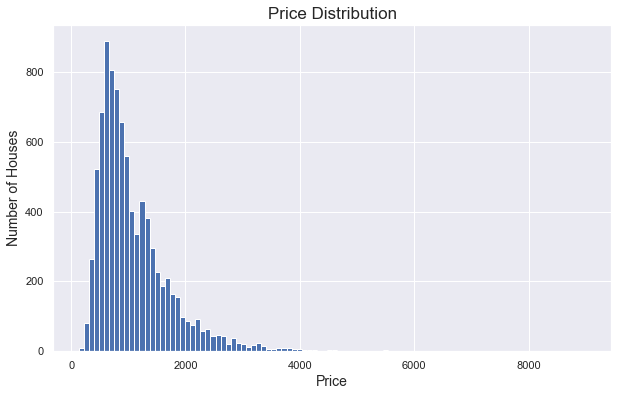

In [26]:
# Target Histogram
plt.figure(figsize=[10,6])
plt.hist(labeled_data['Price_Thousands'],bins=100)

plt.title('Price Distribution', fontsize=17)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of Houses', fontsize=14)

plt.show()

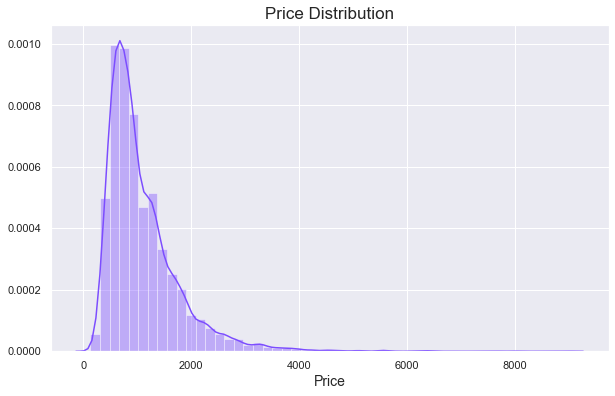

In [27]:
# Histogram of the target plus estimation of Probability Density Function
plt.figure(figsize=[10,6])
sns.distplot(labeled_data['Price_Thousands'], color='#7C4DFF')


plt.title('Price Distribution', fontsize=17)
plt.xlabel('Price', fontsize=14)
#plt.ylabel('Number of Houses', fontsize=14)

plt.show()

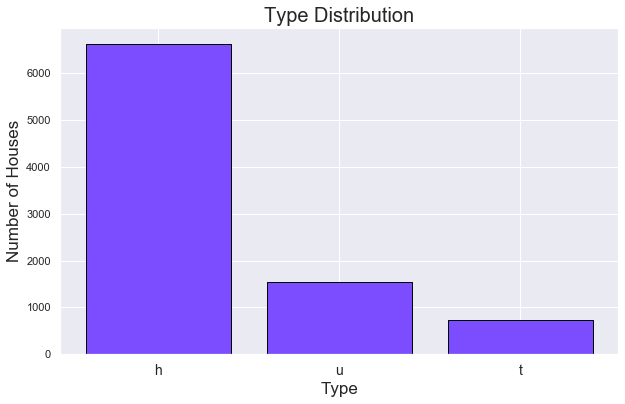

In [28]:
# Bar chart showing type of the house/apartment

# Type:
#     br - bedroom(s);
#     h - house,cottage,villa, semi,terrace;
#     u - unit, duplex;
#     t - townhouse;
#     dev site - development site;
#     o res - other residential.

plt.figure(figsize=[10,6])
frequency_type = labeled_data['Type'].value_counts()
plt.bar(frequency_type.index, height=frequency_type, color='#7C4DFF', ec='black')


plt.title('Type Distribution', fontsize=20)
plt.xlabel('Type', fontsize=17)
plt.ylabel('Number of Houses', fontsize=17)
plt.xticks( fontsize=14)
plt.show()

In [29]:
frequency_type

h    6624
u    1540
t     722
Name: Type, dtype: int64

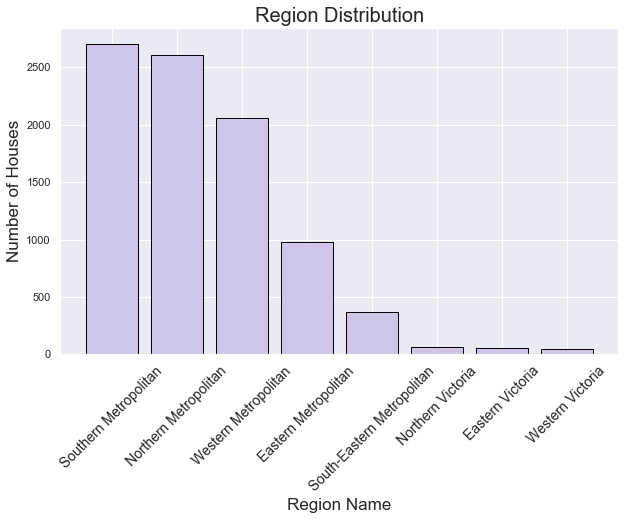

In [30]:
plt.figure(figsize=[10,6])
frequency_reqion=labeled_data['Regionname'].value_counts()
plt.bar(frequency_reqion.index, height=frequency_reqion, ec='black', color='#D1C4E9')

plt.title('Region Distribution', fontsize=20)
plt.xlabel('Region Name', fontsize=17)
plt.ylabel('Number of Houses',fontsize=17)
plt.xticks(rotation=45, fontsize=14)
plt.show()

In [31]:
frequency_reqion

Southern Metropolitan         2707
Northern Metropolitan         2612
Western Metropolitan          2059
Eastern Metropolitan           981
South-Eastern Metropolitan     371
Northern Victoria               62
Eastern Victoria                51
Western Victoria                43
Name: Regionname, dtype: int64

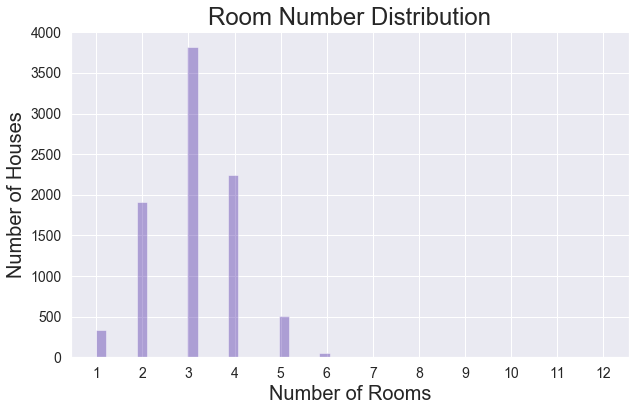

In [32]:
plt.figure(figsize=[10,6])
sns.distplot(labeled_data['Rooms'], hist=True, kde=False, color='#512DA8')

plt.title('Room Number Distribution', fontsize=24)
plt.xlabel('Number of Rooms', fontsize=20)
plt.ylabel('Number of Houses', fontsize=20)
plt.xticks(np.arange(1,13),fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [33]:
labeled_data['Rooms'].value_counts()

3     3823
4     2240
2     1912
5      507
1      340
6       51
7        7
8        4
12       1
10       1
Name: Rooms, dtype: int64

In [34]:
# double checking for mising values
labeled_data.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price_Thousands    0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt          0
CouncilArea        0
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
dtype: int64

In [35]:
labeled_data['Address']

2         25 Bloomburg St
4            5 Charles St
6             55a Park St
11           124 Yarra St
14          98 Charles St
               ...       
34847     27 Birchmore Rd
34849     35 Kingscote Wy
34853       29A Murray St
34854      147A Severn St
34856    3 Tarrengower St
Name: Address, Length: 8886, dtype: object

In [36]:
# Viewing categorical features
labeled_data.describe(include=[np.object])

,Suburb,Address,Type,CouncilArea,Regionname
count,8886,8886,8886,8886,8886
unique,315,8763,3,33,8
top,Reservoir,1/1 Clarendon St,h,Boroondara City Council,Southern Metropolitan
freq,194,3,6624,810,2707


In [37]:
# I will drop address column as there is no reasonable way to encode them and
# it's representation is less then two rows per class in over 8000 datapoints

labeled_data = labeled_data.drop(columns=['Address'])
labeled_data.describe(include = [np.object])

,Suburb,Type,CouncilArea,Regionname
count,8886,8886,8886,8886
unique,315,3,33,8
top,Reservoir,h,Boroondara City Council,Southern Metropolitan
freq,194,6624,810,2707


In [38]:
labeled_data.describe(include = [np.number])

,Rooms,Price_Thousands,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8886.00000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000
mean,3.09892,1092.889576,11.199550,3111.658451,3.078213,1.646523,1.691987,523.448458,149.313113,1965.839973,-37.804494,144.991379,7475.277290
std,0.96384,679.419185,6.813711,112.619908,0.966323,0.721619,0.975212,1061.379689,87.929860,36.131506,0.090551,0.118918,4374.824269
min,1.00000,131.000000,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1830.000000,-38.174360,144.423790,249.000000
25%,2.00000,641.000000,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858515,144.920000,4381.250000
50%,3.00000,900.000000,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998475,6567.000000
75%,4.00000,1345.000000,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748932,145.064515,10331.000000
max,12.00000,9000.000000,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


In [39]:
# Encoding postcode as string since it's categorical not numerical feature
labeled_data = labeled_data.astype({'Postcode':'Int64'})
labeled_data = labeled_data.astype({'Postcode':str})
labeled_data.describe(include=[np.object])

,Suburb,Type,Postcode,CouncilArea,Regionname
count,8886,8886,8886,8886,8886
unique,315,3,194,33,8
top,Reservoir,h,3073,Boroondara City Council,Southern Metropolitan
freq,194,6624,194,810,2707


In [40]:
labeled_data.describe(include=[np.object])

,Suburb,Type,Postcode,CouncilArea,Regionname
count,8886,8886,8886,8886,8886
unique,315,3,194,33,8
top,Reservoir,h,3073,Boroondara City Council,Southern Metropolitan
freq,194,6624,194,810,2707


In [41]:
# We have 4 categorical features and 2 numerical encoding location
# categorical features are dependent on each other hierarchy: suburb - post code - council area - region name
# lattitude and longtitude give information about location while missing info about neighbourhood status
# propertycount is directly inferred from location

In [42]:
# dropping features post code - council area - region name
# along with lattitude, longtitude and longtitude to avoid multicolinearity

In [43]:
labeled_data.drop(columns=['Postcode', 'CouncilArea', 'Regionname', 'Lattitude','Longtitude', 'Propertycount'],
                  inplace=True)

In [44]:
# Columns that we are using
labeled_data.columns

Index(['Suburb', 'Rooms', 'Type', 'Price_Thousands', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt'],
      dtype='object')

In [45]:
# checking how many datapoints without missing values we have just for these columns
# overriding our labeled_data with this slice

labeled_data = data[labeled_data.columns].dropna()

### one hot encoding categorical data with LabelBinarizer from sklearn

In [46]:
# encoding type of the house/apartment - we leave unit as basic level

lb_type = LabelBinarizer()
types = labeled_data['Type']
lb_type.fit(types)
bin_type = pd.DataFrame(lb_type.transform(types),
                        columns=['Type_'+ i for i in lb_type.classes_],
                        index=types.index )

# Dropping one column to avoid mutlicolinearity
bin_type.drop(columns='Type_h', inplace=True)
bin_type

,Type_t,Type_u
2,0,0
4,0,0
6,0,0
11,0,0
14,0,0
...,...,...
34847,0,0
34849,0,0
34853,0,0
34854,1,0


In [47]:
# one hot encoding of suburb
suburbs = labeled_data['Suburb']
lb_s = LabelBinarizer()
lb_s.fit(suburbs)
bin_s = pd.DataFrame(lb_s.transform(suburbs),
                        columns=['Suburb_'+ i for i in lb_s.classes_],
                        index=suburbs.index )

# we leave suburb reservoir as basic level
bin_s.drop(columns='Suburb_Reservoir', inplace=True)
bin_s

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,...,Suburb_Westmeadows,Suburb_Wheelers Hill,Suburb_Whittlesea,Suburb_Williams Landing,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville
2,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0
34849,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0
34853,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1
34854,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
# I will drop the categorical feature
labeled_data.drop(columns=['Type','Suburb'], inplace=True)

In [49]:
# I will join our dataset with binary encoding of these features 
# (I already dropped one category per each feature to avoid multicolinearity)

new_labeled_data = labeled_data.join([bin_type, bin_s])

In [50]:
new_labeled_data.describe(include=[np.number])

,Rooms,Price_Thousands,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Type_t,Type_u,Suburb_Abbotsford,...,Suburb_Westmeadows,Suburb_Wheelers Hill,Suburb_Whittlesea,Suburb_Williams Landing,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville
count,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,...,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000
mean,3.098831,1092.512118,11.201799,3.078143,1.646728,1.692377,523.363279,149.299339,1965.863953,0.081628,0.173263,0.004385,...,0.001237,0.001124,0.000112,0.000450,0.007870,0.001124,0.003148,0.002249,0.001349,0.002024,0.000112,0.012480
std,0.963644,679.243841,6.815422,0.966124,0.721396,0.975140,1060.996227,87.902840,36.146813,0.273813,0.378496,0.066078,...,0.035148,0.033514,0.010604,0.021204,0.088371,0.033514,0.056023,0.047370,0.036709,0.044944,0.010604,0.111022
min,1.000000,131.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1830.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,640.250000,6.400000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,900.000000,10.200000,3.000000,2.000000,2.000000,477.500000,132.000000,1970.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1345.000000,13.900000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,9000.000000,47.400000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# checking correlation of all non-categorical features
labeled_data.corr()

,Rooms,Price_Thousands,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
Rooms,1.000000,0.474858,0.276989,0.964482,0.623980,0.401405,0.101065,0.606833,0.007191
Price_Thousands,0.474858,1.000000,-0.231378,0.460660,0.463190,0.209152,0.058419,0.507205,-0.321345
Distance,0.276989,-0.231378,1.000000,0.283862,0.122446,0.259435,0.138286,0.135722,0.322711
Bedroom2,0.964482,0.460660,0.283862,1.000000,0.626411,0.405554,0.100940,0.595396,0.016858
Bathroom,0.623980,0.463190,0.122446,0.626411,1.000000,0.311458,0.075764,0.553735,0.196095
Car,0.401405,0.209152,0.259435,0.405554,0.311458,1.000000,0.123288,0.317631,0.148716
Landsize,0.101065,0.058419,0.138286,0.100940,0.075764,0.123288,1.000000,0.083204,0.038817
BuildingArea,0.606833,0.507205,0.135722,0.595396,0.553735,0.317631,0.083204,1.000000,0.060625
YearBuilt,0.007191,-0.321345,0.322711,0.016858,0.196095,0.148716,0.038817,0.060625,1.000000


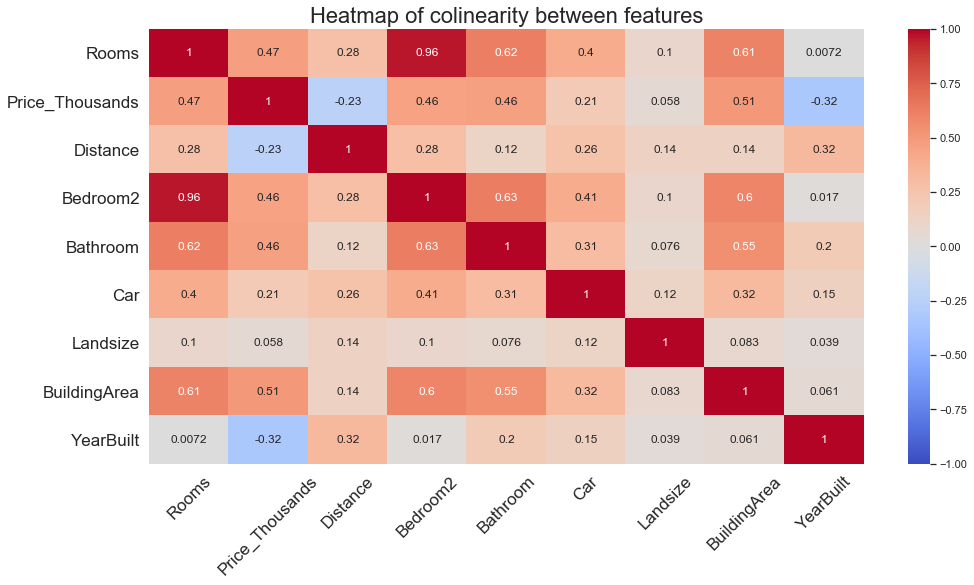

In [52]:
# Displaying correlation of the data in heatmap
plt.figure(figsize=[16,8])
sns.heatmap(labeled_data.corr(), cmap=cm.coolwarm, vmin=-1, vmax=1, annot=True, annot_kws={'size':12})
plt.title('Heatmap of colinearity between features', fontsize=22)
plt.xticks(rotation=45, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

It seems like the number of rooms and number of bedrooms are highly correlated -> the houses with more rooms would typically have more bedrooms.

I will consider removing this column later on based on BIC value and VIF scores.

In [53]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8894 entries, 2 to 34856
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rooms            8894 non-null   int64  
 1   Price_Thousands  8894 non-null   float64
 2   Distance         8894 non-null   float64
 3   Bedroom2         8894 non-null   float64
 4   Bathroom         8894 non-null   float64
 5   Car              8894 non-null   float64
 6   Landsize         8894 non-null   float64
 7   BuildingArea     8894 non-null   float64
 8   YearBuilt        8894 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 1014.8 KB


### Visualization of relationships between features

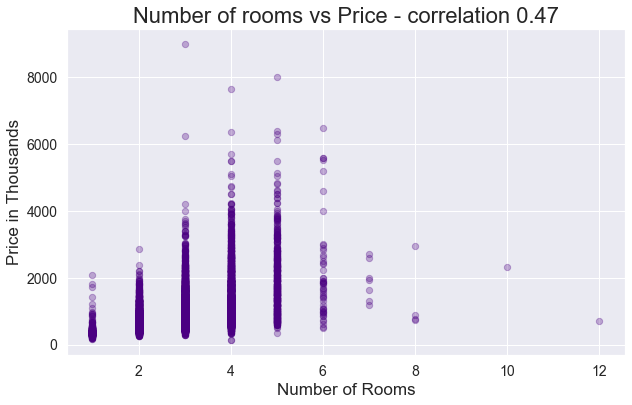

In [54]:
room_price_corr = round(labeled_data.Rooms.corr(labeled_data.Price_Thousands),2)

plt.figure(figsize=[10,6])
plt.scatter(labeled_data.Rooms, labeled_data.Price_Thousands, c='indigo', alpha = 0.3, s=40)

plt.title(f'Number of rooms vs Price - correlation {room_price_corr}', fontsize = 22)
plt.xlabel('Number of Rooms', fontsize=17)
plt.ylabel('Price in Thousands', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

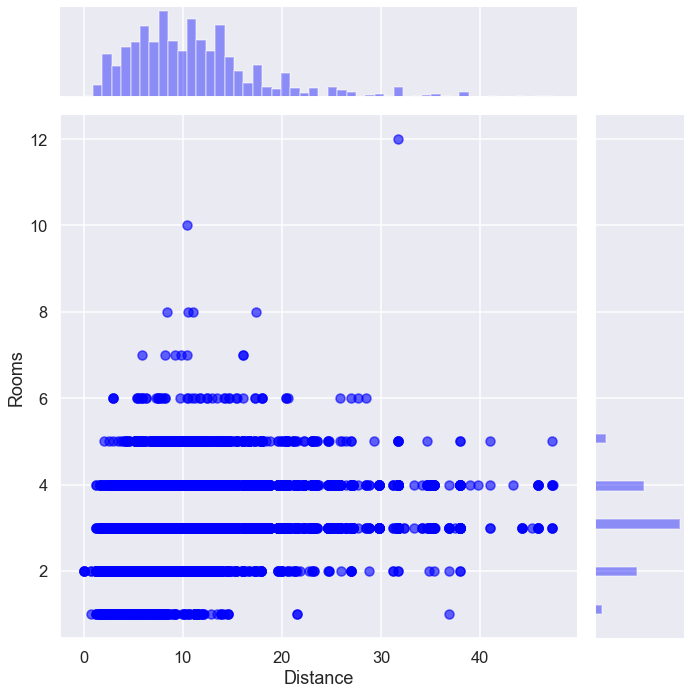

In [55]:
sns.set() # default styling
sns.set_context('talk')
sns.jointplot(x=labeled_data.Distance, y=labeled_data.Rooms, height=10, color='blue',
             joint_kws={'alpha':0.6})
plt.show()

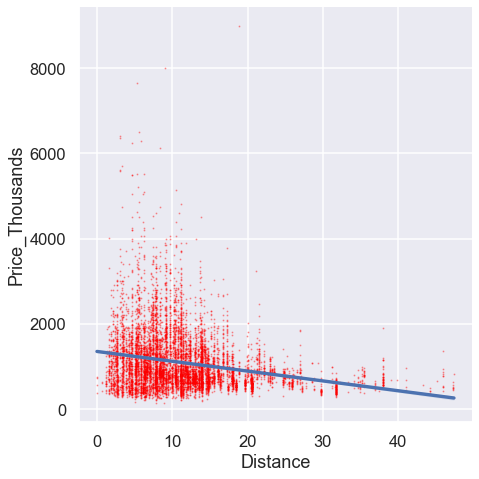

In [56]:
sns.lmplot(x='Distance', y='Price_Thousands', data=labeled_data, height=7,
          scatter_kws={'alpha':0.3, 's':1,'color':'red'})
plt.show()

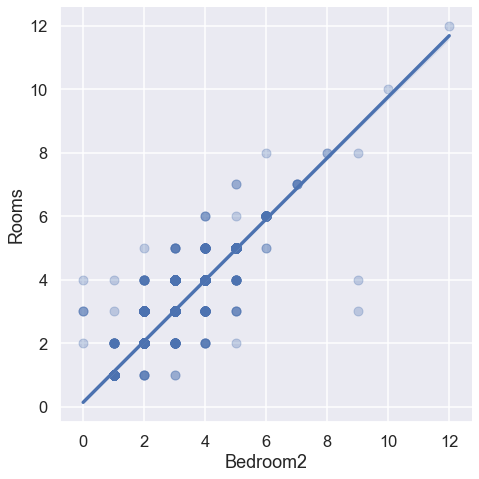

In [57]:
sns.lmplot(x='Bedroom2', y='Rooms', data=labeled_data, height=7, 
      scatter_kws={'alpha': 0.3})
plt.show()

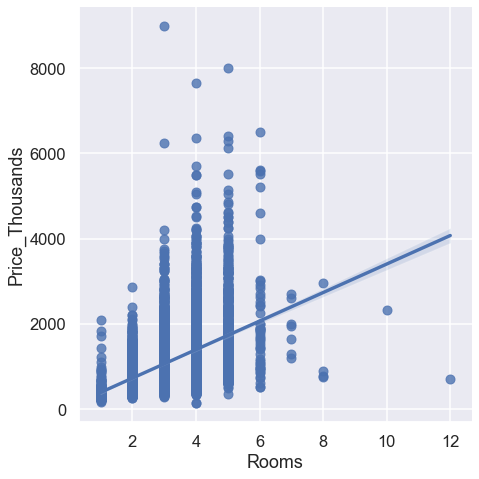

In [58]:
sns.lmplot(x='Rooms', y='Price_Thousands', data=labeled_data, height=7)
plt.show()

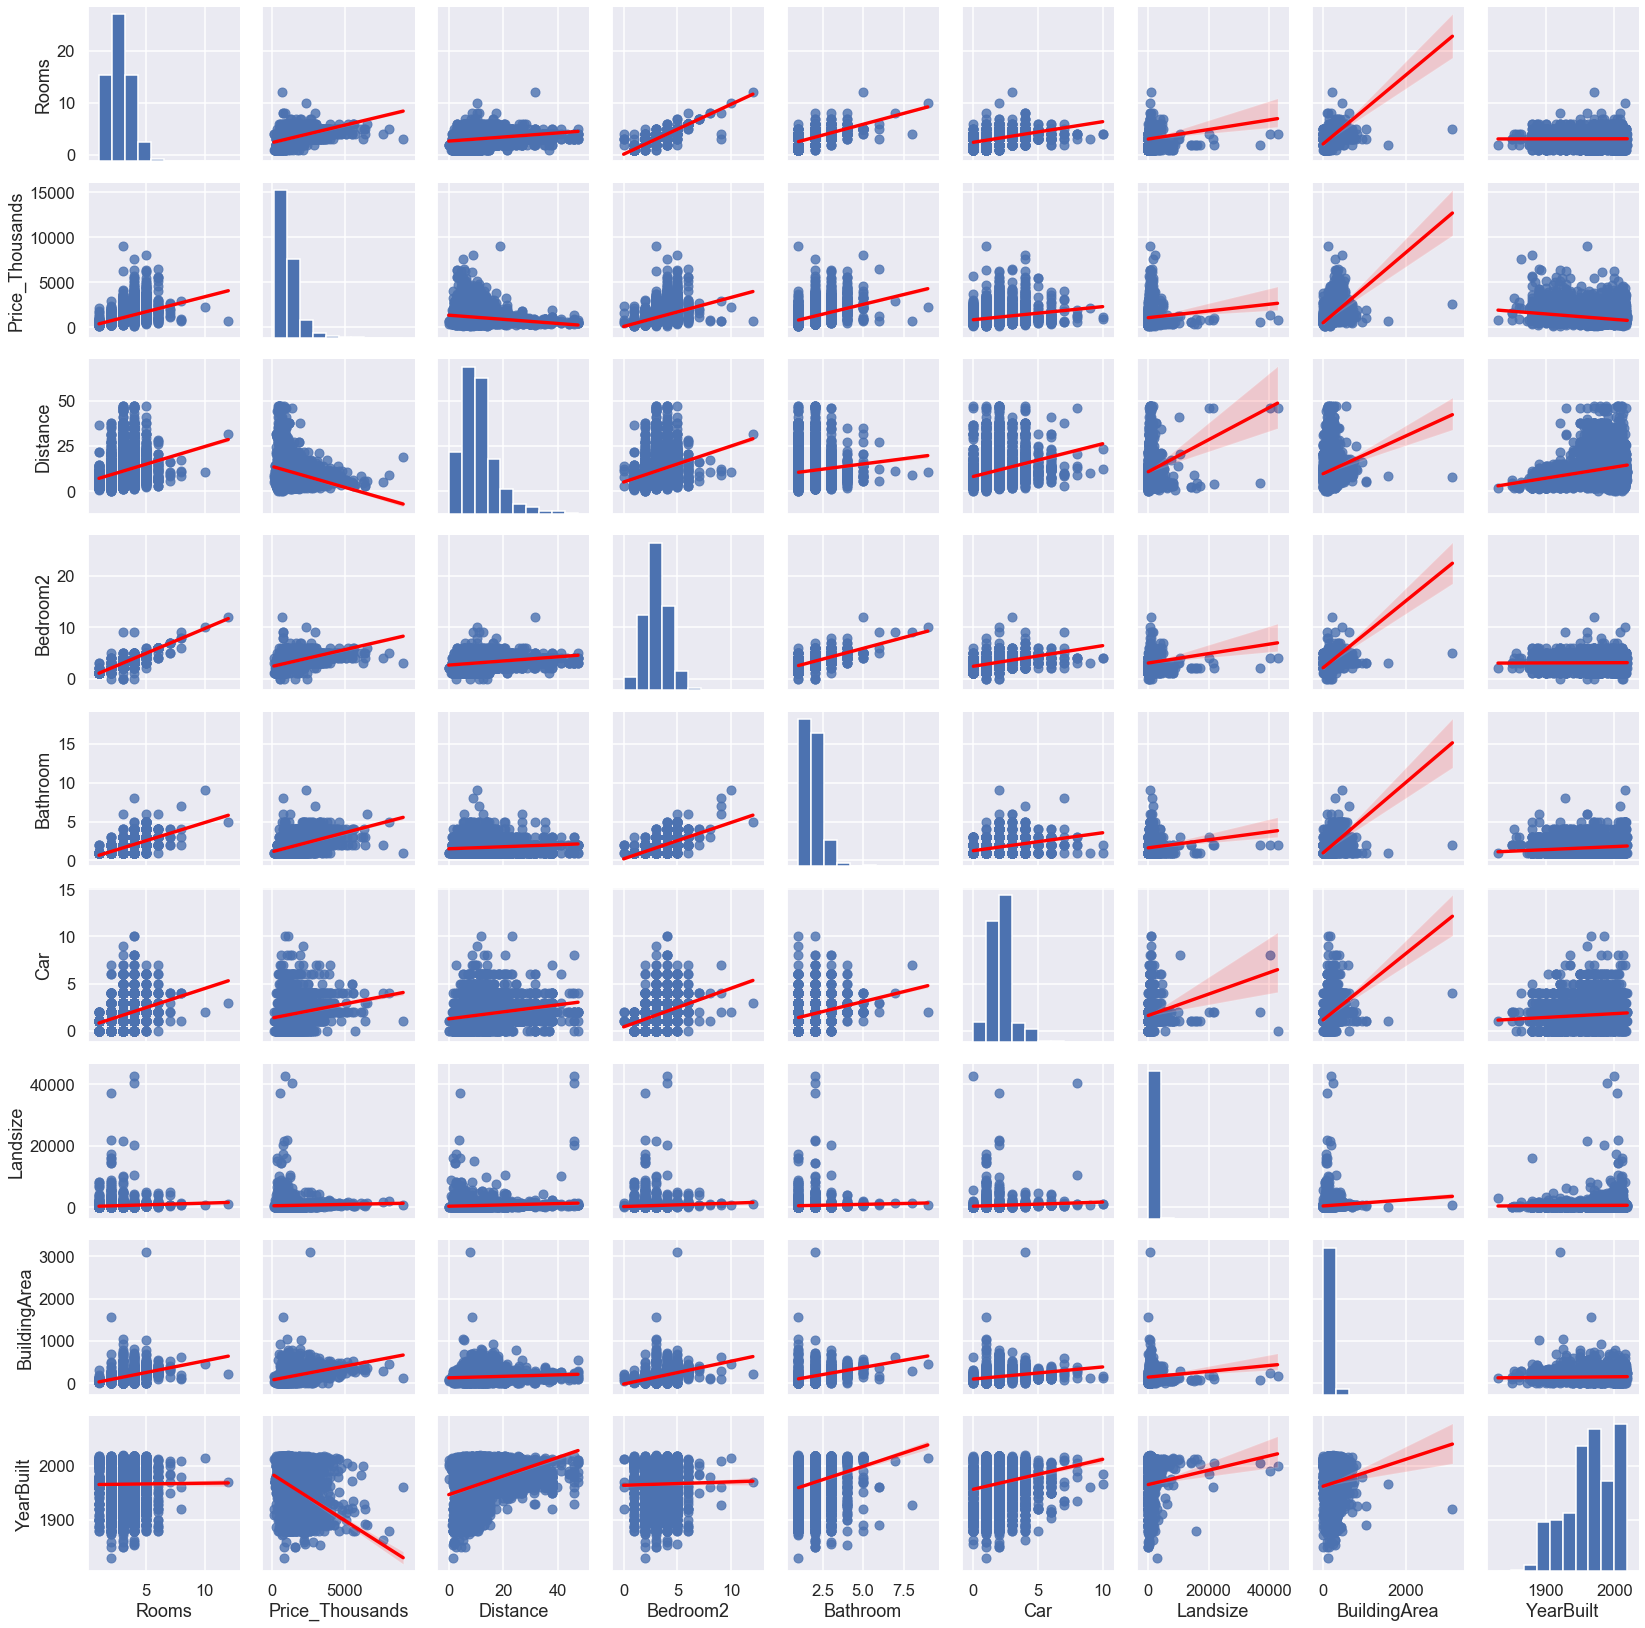

In [59]:
sns.pairplot(labeled_data, kind='reg',
            plot_kws={'line_kws':{'color':'red'}})
plt.show()

## Splitting data into test and training

In [60]:
# Separating the features from regression target
features = new_labeled_data.drop('Price_Thousands', axis=1)
target = new_labeled_data['Price_Thousands']

In [61]:
# Shuffling and splitting the data using sklearn
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Model 1 - regression without categorical features 

In [62]:
# separating non-categorical features
X_train_num  = X_train[['Rooms','Distance','Bedroom2', 'Bathroom', 'Car','Landsize','BuildingArea', 'YearBuilt']]
X_test_num  = X_test[['Rooms','Distance','Bedroom2', 'Bathroom', 'Car','Landsize','BuildingArea', 'YearBuilt']]

In [63]:
# fitting(training) the regression
regr1 = LinearRegression()
regr1.fit(X_train_num, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# evaluating the model
print('Intercept:', round(regr1.intercept_,2))
print('Training data R2:', regr1.score(X_train_num, y_train))
print('Test data R2:', regr1.score(X_test_num, y_test))

Intercept: 11499.15
Training data R2: 0.5356071540344165
Test data R2: 0.5279220815343609


In [65]:
# explainability of each feature
model1_explain = pd.DataFrame(data=regr1.coef_, index=X_train_num.columns, columns=['Coefficient'])
model1_explain

,Coefficient
Rooms,145.128877
Distance,-27.323616
Bedroom2,-8.025118
Bathroom,245.394391
Car,53.117877
Landsize,0.021388
BuildingArea,2.100294
YearBuilt,-5.772367


## Model 2 - regression using categorical features for type 
house, townhouse, unit
- basic level: house

In [66]:
# Shuffling and splitting the data using sklearn
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# separating non-categorical features
X_train_new  = X_train[['Rooms','Distance','Bedroom2', 'Bathroom', 'Car','Landsize',
                        'BuildingArea', 'YearBuilt', 'Type_u', 'Type_t']]
X_test_new  = X_test[['Rooms','Distance','Bedroom2', 'Bathroom', 'Car','Landsize',
                          'BuildingArea', 'YearBuilt','Type_u', 'Type_t']]

# fitting the regression on data with categorical features one-hot encoded
regr3 = LinearRegression()
regr3.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# evaluating the model
print('Intercept:', round(regr3.intercept_,2))
print('Training data R2:', regr3.score(X_train_new, y_train))
print('Test data R2:', regr3.score(X_test_new, y_test))

Intercept: 10605.22
Training data R2: 0.5401914097880935
Test data R2: 0.5332648266987928


In [68]:
# explainability of each feature
model3_explain = pd.DataFrame(data=regr3.coef_, index=X_train_new.columns, columns=['Coefficient'])
model3_explain

,Coefficient
Rooms,127.109980
Distance,-29.213256
Bedroom2,-18.266868
Bathroom,248.804781
Car,48.621326
Landsize,0.023142
BuildingArea,2.042953
YearBuilt,-5.241303
Type_u,-159.256371
Type_t,-46.077221


## Model 4 - feature selection
Getting rid of the features that introduce multicolinearity. I will build the model with statsmodel.api library as it shows more metrics like BIC - Bayesian Information Creiterium, p-values and have VIF more acessible.

In [69]:
# adding constant for intercept - required for reqression in statsmodel
features_stats = sm.add_constant(features)

# Shuffling and splitting the data using sklearn
X_train, X_test, y_train, y_test = train_test_split(features_stats, target, test_size=0.2, random_state=42)

# separating non-categorical features
X_train_new  = X_train[['const','Rooms','Distance','Bedroom2', 'Bathroom', 'Car','Landsize',
                        'BuildingArea', 'YearBuilt', 'Type_u', 'Type_t']]
X_test_new  = X_test[['const','Rooms','Distance','Bedroom2', 'Bathroom', 'Car','Landsize',
                          'BuildingArea', 'YearBuilt','Type_u', 'Type_t']]

model4=sm.OLS(y_train, X_train_new)

results4 = model4.fit()

result_pvalues = pd.DataFrame({'Coefficient': round(results4.params,4),
             'p_values': round(results4.pvalues,4)
             })
print('BIC: ', results4.bic)
print(results4.summary())

BIC:  107527.49223491787
                            OLS Regression Results                            
Dep. Variable:        Price_Thousands   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     834.6
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:59:43   Log-Likelihood:                -53715.
No. Observations:                7115   AIC:                         1.075e+05
Df Residuals:                    7104   BIC:                         1.075e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.061e+04

In [70]:
# displaying features with p-values above 0.05 
result_pvalues[result_pvalues['p_values']>0.05]

,Coefficient,p_values
Bedroom2,-18.2669,0.3828


In [71]:
VIF_columns = pd.DataFrame(index=X_train_new.columns)

VIF_list = []

for i in range(len(X_train_new.columns)):
    x = variance_inflation_factor(exog=X_train_new.values, exog_idx=i)
    VIF_list.append(round(x,2))
    
VIF_columns['VIF'] = VIF_list

VIF_columns

,VIF
const,4440.23
Rooms,14.05
Distance,1.41
Bedroom2,13.91
Bathroom,1.99
Car,1.27
Landsize,1.03
BuildingArea,1.71
YearBuilt,1.56
Type_u,1.76


### Model 5 - without bedroom 2 column

In [72]:
# adding constant for intercept - required for reqression in statsmodel
features_stats = sm.add_constant(features)

# Shuffling and splitting the data using sklearn
X_train, X_test, y_train, y_test = train_test_split(features_stats, target, test_size=0.2, random_state=42)

# separating non-categorical features
X_train_new  = X_train[['const','Rooms','Distance', 'Bathroom', 'Car','Landsize',
                        'BuildingArea', 'YearBuilt', 'Type_u', 'Type_t']]
X_test_new  = X_test[['const','Rooms','Distance', 'Bathroom', 'Car','Landsize',
                          'BuildingArea', 'YearBuilt','Type_u', 'Type_t']]

model5=sm.OLS(y_train, X_train_new)

results5 = model5.fit()

result_pvalues = pd.DataFrame({'Coefficient': round(results5.params,4),
             'p_values': round(results5.pvalues,4)
             })
print('BIC: ', results5.bic)
print(results5.summary())

BIC:  107519.38509344783
                            OLS Regression Results                            
Dep. Variable:        Price_Thousands   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     927.3
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:59:44   Log-Likelihood:                -53715.
No. Observations:                7115   AIC:                         1.075e+05
Df Residuals:                    7105   BIC:                         1.075e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.06e+04

In [73]:
VIF_columns = pd.DataFrame(index=X_train_new.columns)

VIF_list = []

for i in range(len(X_train_new.columns)):
    x = variance_inflation_factor(exog=X_train_new.values, exog_idx=i)
    VIF_list.append(round(x,2))
    
VIF_columns['VIF'] = VIF_list

VIF_columns

,VIF
const,4439.85
Rooms,2.62
Distance,1.40
Bathroom,1.95
Car,1.27
Landsize,1.03
BuildingArea,1.71
YearBuilt,1.56
Type_u,1.76
Type_t,1.27


In [74]:
# fitting the regression 
regr5 = LinearRegression()
regr5.fit(X_train_new, y_train)
# evaluating the model
print('Intercept:', round(regr5.intercept_,2))
print('Training data R2:', regr5.score(X_train_new, y_train))
print('Test data R2:', regr5.score(X_test_new, y_test))

Intercept: 10602.31
Training data R2: 0.5401421097809613
Test data R2: 0.5333492875724564


In [75]:
# I will get rid of Bedroom 2 columns as
# BIC (lower the better) and VIF (preferably below 3)
# improve without it

features.drop(columns=['Bedroom2'], inplace = True)

In [76]:
features

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Type_t,Type_u,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,...,Suburb_Westmeadows,Suburb_Wheelers Hill,Suburb_Whittlesea,Suburb_Williams Landing,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville
2,2,2.5,1.0,0.0,156.0,79.0,1900.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2.5,2.0,0.0,134.0,150.0,1900.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
6,4,2.5,1.0,2.0,120.0,142.0,2014.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
11,3,2.5,2.0,0.0,245.0,210.0,1910.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
14,2,2.5,1.0,2.0,256.0,107.0,1890.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,3,25.5,2.0,2.0,383.0,118.0,2016.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0
34849,3,25.5,2.0,2.0,404.0,158.0,2012.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0
34853,2,6.3,2.0,1.0,98.0,104.0,2018.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1
34854,2,6.3,1.0,2.0,220.0,120.0,2000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1


### Model 6 with all categorical features

In [77]:
# Shuffling and splitting the data using sklearn
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# fitting the regression on data with categorical features one-hot encoded
regr6 = LinearRegression()
regr6.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
# evaluating the model
print('Intercept:', round(regr6.intercept_,2))
print('Training data R2:', regr6.score(X_train, y_train))
print('Test data R2:', regr6.score(X_test, y_test))

Intercept: 4559.62
Training data R2: 0.7295280503119083
Test data R2: -1716545289614934.0


In [79]:
# explainability of each feature
model6_explain = pd.DataFrame(data=regr6.coef_, index=X_train.columns, columns=['Coefficient'])
model6_explain

,Coefficient
Rooms,133.002881
Distance,-46.978168
Bathroom,142.888620
Car,54.616484
Landsize,0.024946
...,...
Suburb_Wollert,292.604927
Suburb_Wyndham Vale,337.355310
Suburb_Yallambie,5.812423
Suburb_Yarra Glen,598.348243


In [80]:
# Adjusted R-square on test data seems to be unreasonable let's take a look at statistics in statsmodel

In [81]:
X_train

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Type_t,Type_u,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,...,Suburb_Westmeadows,Suburb_Wheelers Hill,Suburb_Whittlesea,Suburb_Williams Landing,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville
18044,3,3.4,1.0,1.0,293.0,104.0,1900.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
6051,3,5.6,1.0,1.0,298.0,130.0,1900.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
9331,3,3.3,1.0,0.0,154.0,88.0,1920.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
34419,4,7.3,2.0,4.0,650.0,304.0,2007.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
5749,3,12.8,1.0,2.0,558.0,105.0,1980.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18420,2,13.4,1.0,1.0,305.0,305.0,1940.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
16738,5,5.2,3.0,4.0,957.0,320.0,1995.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
17438,4,35.2,5.0,2.0,638.0,352.0,2014.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2686,3,7.8,1.0,1.0,544.0,160.0,1930.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
# adding constant for intercept - required for reqression in statsmodel
X_train = sm.add_constant(X_train)

model6=sm.OLS(y_train, X_train)

results6 = model6.fit()

result_pvalues = pd.DataFrame({'Coefficient': round(results6.params,4),
             'p_values': round(results6.pvalues,4)
             })
print('BIC: ', results6.bic)
print(results6.summary())

BIC:  106501.66287644165
                            OLS Regression Results                            
Dep. Variable:        Price_Thousands   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     57.27
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:59:45   Log-Likelihood:                -51827.
No. Observations:                7115   AIC:                         1.043e+05
Df Residuals:                    6794   BIC:                         1.065e+05
Df Model:                         320                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [83]:
# displaying features with p-values above 0.05
similar_suburb = result_pvalues[result_pvalues['p_values']>0.05].index
similar_suburb.shape

(159,)

## Model 7 - simplified

In [84]:
# Shuffling and splitting the data using sklearn
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Simplyfying model by driping distance, landsize, building_area, yearbuilt
X_train.drop(columns=['Distance','Landsize','BuildingArea'], inplace=True)
X_test.drop(columns=['Distance','Landsize','BuildingArea'],inplace=True)

# fitting the regression on data with categorical features one-hot encoded
regr7 = LinearRegression()
regr7.fit(X_train, y_train)

# evaluating the model
print('Intercept:', round(regr7.intercept_,2))
print('Training data R2:', regr7.score(X_train, y_train))
print('Test data R2:', regr7.score(X_test, y_test))

C:\Users\magda\Anaconda3\envs\my_portfolio\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Intercept: 3471.5
Training data R2: 0.7083262662232486
Test data R2: 0.6778695544466329


In [85]:
# explainability of each feature
model7_explain = pd.DataFrame(data=regr7.coef_, index=X_train.columns, columns=['Coefficient'])
model7_explain



,Coefficient
Rooms,178.070001
Bathroom,185.020976
Car,63.504199
YearBuilt,-1.784172
Type_t,-251.964079
...,...
Suburb_Wollert,-397.531211
Suburb_Wyndham Vale,-429.071963
Suburb_Yallambie,-133.122314
Suburb_Yarra Glen,-295.514248


In [86]:
# Adjusted R-square on test data seems to be more reasonable

# adding constant for intercept - required for reqression in statsmodel
X_train = sm.add_constant(X_train)

model7=sm.OLS(y_train, X_train)

results7 = model7.fit()

result_pvalues = pd.DataFrame({'Coefficient': round(results7.params,4),
             'p_values': round(results7.pvalues,4)
             })
print('BIC: ', results7.bic)
print(results7.summary())



BIC:  107012.00377778099
                            OLS Regression Results                            
Dep. Variable:        Price_Thousands   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     52.07
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:59:46   Log-Likelihood:                -52096.
No. Observations:                7115   AIC:                         1.048e+05
Df Residuals:                    6797   BIC:                         1.070e+05
Df Model:                         317                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [87]:
# displaying number of features with p-values above 0.05
similar_suburb = result_pvalues[result_pvalues['p_values']>0.05].index
similar_suburb.shape

(139,)

## Model evaluation - plotting residuals 

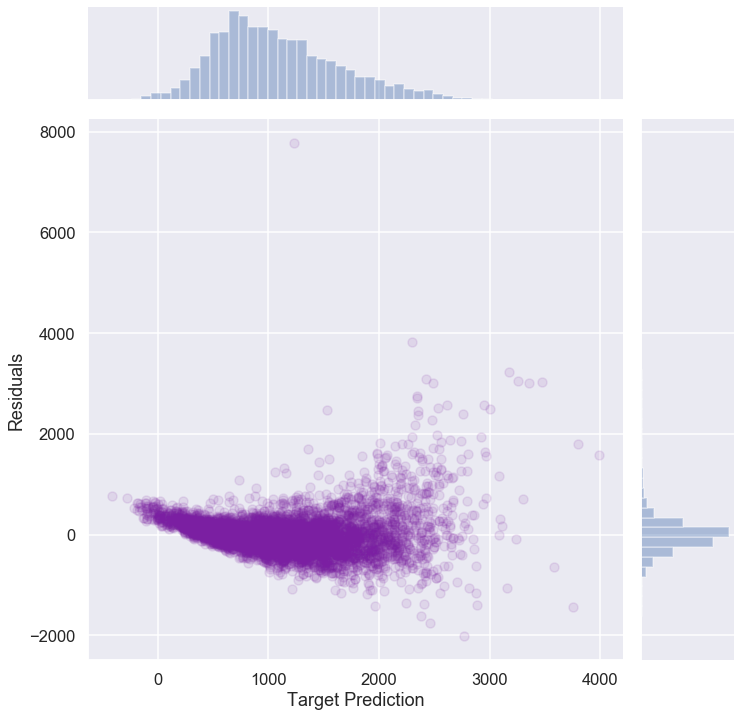

In [88]:
# plotting residuals
sns.jointplot( x=results7.fittedvalues, y = results7.resid, height=10, 
              joint_kws={'alpha':0.1, 'color':'#7B1FA2'},
              ).set_axis_labels('Target Prediction','Residuals')

plt.show()

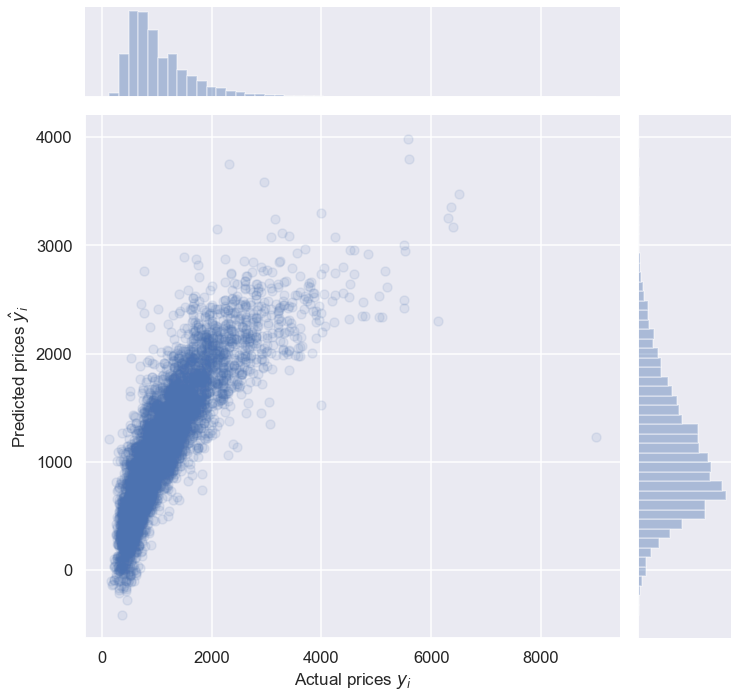

In [89]:
# plotting actual vs predicted prices
sns.jointplot( x=y_train, y = results7.fittedvalues, height=10, 
              joint_kws={'alpha':0.1}
             ).set_axis_labels('Actual prices $y _i$',
                               'Predicted prices $\hat y _i$', fontsize=17)

plt.show()

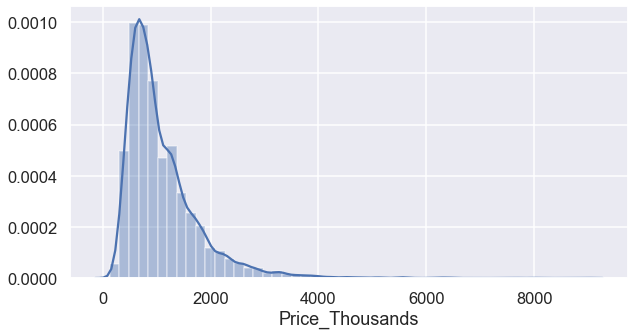

In [90]:
# distribution of target
plt.figure(figsize=[10,5])
sns.distplot(target)
plt.show()

In [91]:
# skewness of target
target.skew()

2.4123982303236478

Considering the residuals, skewness of target and it's distribution I will use log of target for predictions and see if it improves my model.

In [92]:
new_target = np.log(target)

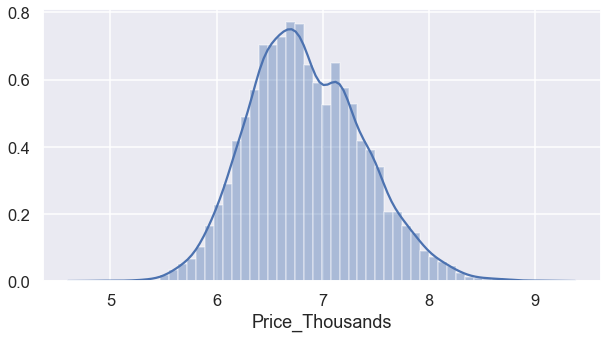

In [93]:
# distribution of new target
plt.figure(figsize=[10,5])
sns.distplot(new_target)
plt.show()

In [94]:
# skewness of target
target.skew()

2.4123982303236478

## Model 8 - with log transformation

In [95]:
similar_suburbs = ['Suburb_Airport West','Suburb_Albion', 'Suburb_Altona North', 'Suburb_Aspendale Gardens',
                  'Suburb_Avondale Heights','Suburb_Bayswater North', 'Suburb_Beaconsfield',
                  'Suburb_Beaconsfield Upper','Suburb_Bellfield', 'Suburb_Briar Hill','Suburb_Yarra Glen']

In [96]:
# Shuffling and splitting the data using sklearn
X_train, X_test, y_train, y_test = train_test_split(features, new_target, test_size=0.2, random_state=42)

# Simplyfying model by droping distance, landsize, building_area, yearbuilt
X_train.drop(columns=['Distance','YearBuilt','Landsize'], inplace=True)
X_test.drop(columns=['Distance','YearBuilt','Landsize'], inplace=True)
#X_train.drop(columns=similar_suburbs, inplace=True)
#X_test.drop(columns=similar_suburbs,inplace=True)


# fitting the regression on data with categorical features one-hot encoded
regr8 = LinearRegression()
regr8.fit(X_train, y_train)

# evaluating the model
print('Intercept:', round(regr8.intercept_,2))
print('Training data R2:', regr8.score(X_train, y_train))
print('Test data R2:', regr8.score(X_test, y_test))

C:\Users\magda\Anaconda3\envs\my_portfolio\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Intercept: 5.97
Training data R2: 0.8216464574202176
Test data R2: 0.8104188342953698


In [97]:
# Adjusted R-square is much better

# adding constant for intercept - required for reqression in statsmodel
X_train = sm.add_constant(X_train)

model8=sm.OLS(y_train, X_train)

results8 = model8.fit()

result_pvalues = pd.DataFrame({'Coefficient': round(results8.params,4),
             'p_values': round(results8.pvalues,4)
             })
print('BIC: ', results8.bic)
print(results8.summary())



BIC:  1804.1037486089117
                            OLS Regression Results                            
Dep. Variable:        Price_Thousands   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     98.78
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:59:51   Log-Likelihood:                 508.27
No. Observations:                7115   AIC:                            -380.5
Df Residuals:                    6797   BIC:                             1804.
Df Model:                         317                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

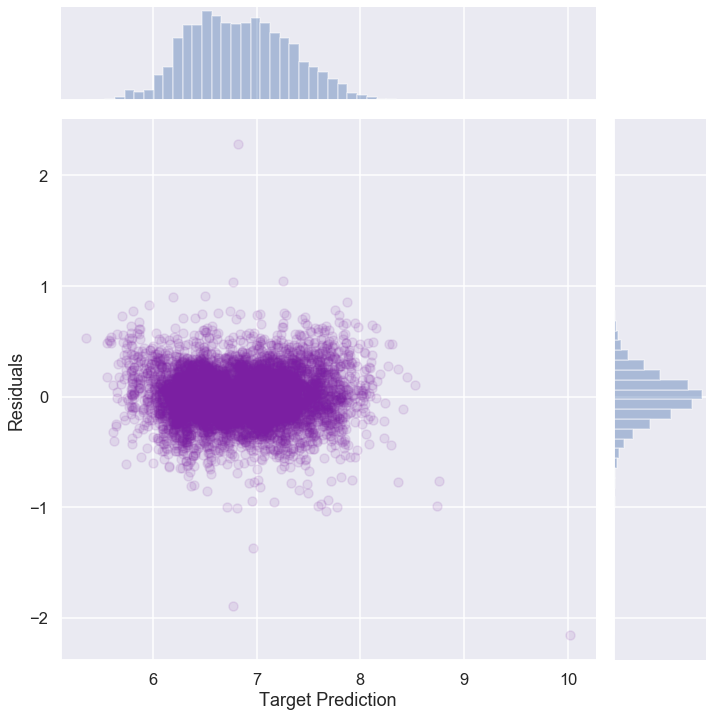

In [98]:
# plotting residuals
sns.jointplot( x=results8.fittedvalues, y = results8.resid, height=10, 
              joint_kws={'alpha':0.1, 'color':'#7B1FA2'},
              ).set_axis_labels('Target Prediction','Residuals')

plt.show()

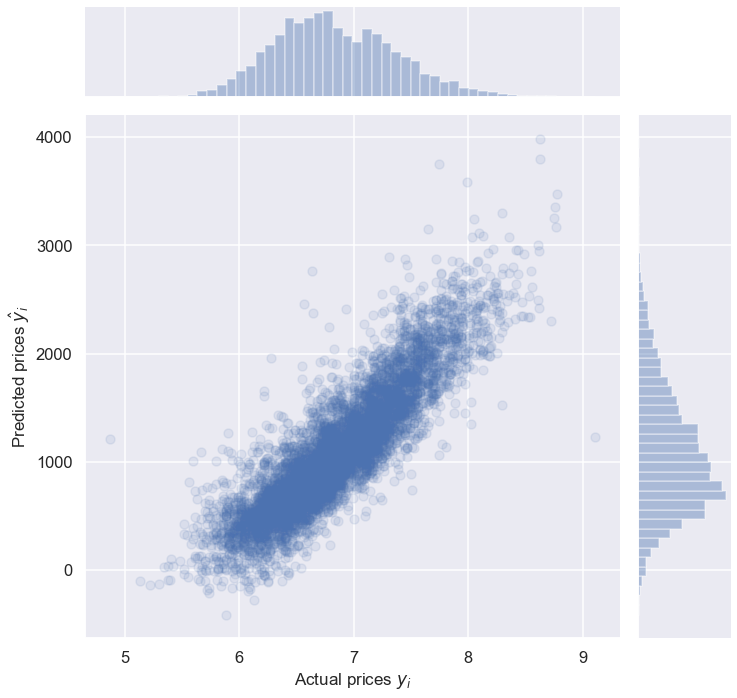

In [99]:
# plotting actual vs predicted prices
sns.jointplot( x=y_train, y = results7.fittedvalues, height=10, 
              joint_kws={'alpha':0.1}
             ).set_axis_labels('Actual prices $y _i$',
                               'Predicted prices $\hat y _i$', fontsize=17)

plt.show()

In [100]:
for i in range(len(X_train.columns)):
    value = variance_inflation_factor(exog=X_train.values, exog_idx=i)
    if value > 3:
        print('VIF',X_train.columns[i],value)

VIF const 63.56222369599039


C:\Users\magda\Anaconda3\envs\my_portfolio\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


## Conclusion

The regression model that I have built have above 0.8 R-squared on test data while making predictions based only on few simple features. 

- number of rooms
- number of bathrooms
- number of parking spaces
- land size
- building area
- type (house, townhouse or unit) - categorical feature
- location (suburb name) - categorical feature

The model became more accurate after calculating log of the target as this function better shows the relationship between features and target. I have included below the coefficients for each feature (besides the suburbs) to show their contribution toward price (target is predicted as log of the price in thousands).

When one hot encoding types - type house was dropped to avoid multicolinearity so
coefficient for types townhouse and unit show contribution to price relative to the type house.

In [101]:
pd.DataFrame({'Coefficient': round(results8.params,4)}).head(7)

,Coefficient
const,5.9710
Rooms,0.1408
Bathroom,0.0554
Car,0.0377
BuildingArea,0.0008
Type_t,-0.2481
Type_u,-0.5958
